In [1]:
import sys

sys.path.append("../src/")

from gpflow.kernels import RBF
from gpflow.likelihoods import Gaussian, SwitchedLikelihood
from cogp import COGP

import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

cols = [c['color'] for c in matplotlib.rcParams['axes.prop_cycle']]

In [16]:
num_samples = 20
num_inducing = 10
num_tasks = 2
dims = 1
noise = 0.1
X = 10*np.random.rand(num_samples,dims)
f1 = lambda x: np.sin(x)
f2 = lambda x: -np.sin(x)
Y1 = f1(X) + noise*np.random.randn(num_samples,1)
Y2 = f2(X) + noise*np.random.randn(num_samples,1)
Z = 10*np.random.rand(num_inducing, dims)

X_aug = np.vstack([np.hstack([X, np.zeros_like(X)]), np.hstack([X, np.ones_like(X)])])
Z_aug = np.vstack([np.hstack([Z, np.zeros_like(Z)]), np.hstack([Z, np.ones_like(Z)])])
Y_aug = np.vstack([np.hstack([Y1, np.zeros_like(Y1)]), np.hstack([Y2, np.ones_like(Y2)])])

print(X_aug.shape, Z_aug.shape, Y_aug.shape)

(40, 2) (20, 2) (40, 2)


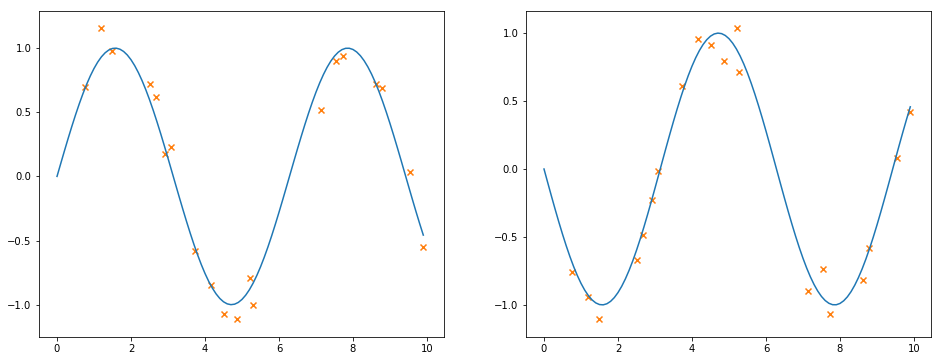

In [17]:
Xs = np.arange(0, 10, 0.1)
Ys1 = f1(Xs)
Ys2 = f2(Xs)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(Xs, Ys1)
plt.scatter(X, Y1, c=cols[1], marker='x')

plt.subplot(122)
plt.plot(Xs, Ys2)
plt.scatter(X, Y2, c=cols[1], marker='x')

In [18]:
shared = [RBF(1, active_dims=[0]) for _ in range(num_tasks)]
tasks = [RBF(1, active_dims=[0]) for _ in range(num_tasks)]

lik = SwitchedLikelihood([Gaussian(), Gaussian()])

model = COGP(X_aug, Y_aug, shared, tasks, lik, Z_aug)

In [19]:
model.optimize()

/home/aboustati/anaconda3/envs/gp-env/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


      fun: 1.4927451086196228
 hess_inv: <824x824 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.62657723e-08,  -0.00000000e+00,   4.06146529e-10,
        -0.00000000e+00,  -2.77428495e-09,  -0.00000000e+00,
        -1.28801265e-09,  -0.00000000e+00,  -7.22496171e-09,
        -0.00000000e+00,  -9.16316587e-09,  -0.00000000e+00,
         1.83047399e-09,  -0.00000000e+00,   8.47079498e-09,
        -0.00000000e+00,  -8.88589063e-09,  -0.00000000e+00,
        -2.07410491e-08,  -0.00000000e+00,   9.17726797e-09,
        -0.00000000e+00,  -5.45412407e-09,  -0.00000000e+00,
         6.41463098e-09,  -0.00000000e+00,   2.29531102e-09,
        -0.00000000e+00,   9.89660464e-09,  -0.00000000e+00,
         9.87035818e-09,  -0.00000000e+00,   3.54705848e-09,
        -0.00000000e+00,  -1.30028773e-08,  -0.00000000e+00,
        -4.07094135e-09,  -0.00000000e+00,  -8.31335389e-09,
        -0.00000000e+00,   3.62657723e-08,  -0.00000000e+00,
         4.06146529e-10,  -0.00000000e+00,  -

In [20]:
Xs_aug = np.vstack([np.hstack([Xs[:,None], np.zeros_like(Xs[:,None])]), np.hstack([Xs[:,None], np.ones_like(Xs[:,None])])])

In [21]:
Y_pred = model.predict_f(Xs_aug)

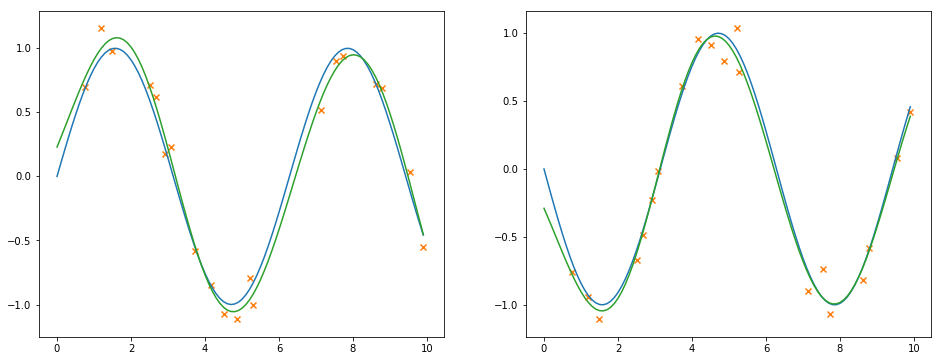

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(Xs, Ys1)
plt.plot(Xs, Y_pred[0][:100,:], c=cols[2])
plt.scatter(X, Y1, c=cols[1], marker='x')

plt.subplot(122)
plt.plot(Xs, Ys2)
plt.plot(Xs, Y_pred[0][100:,:], c=cols[2])
plt.scatter(X, Y2, c=cols[1], marker='x')